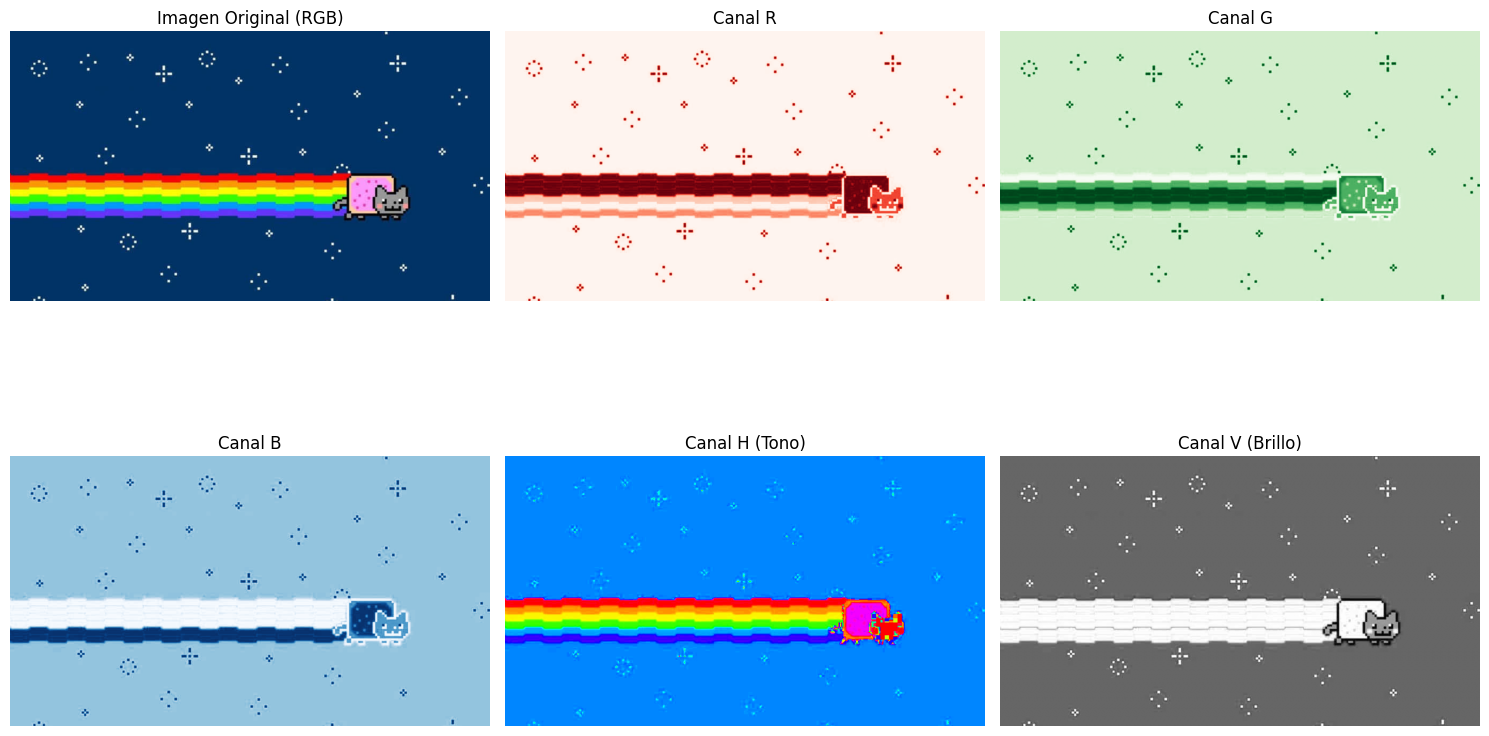

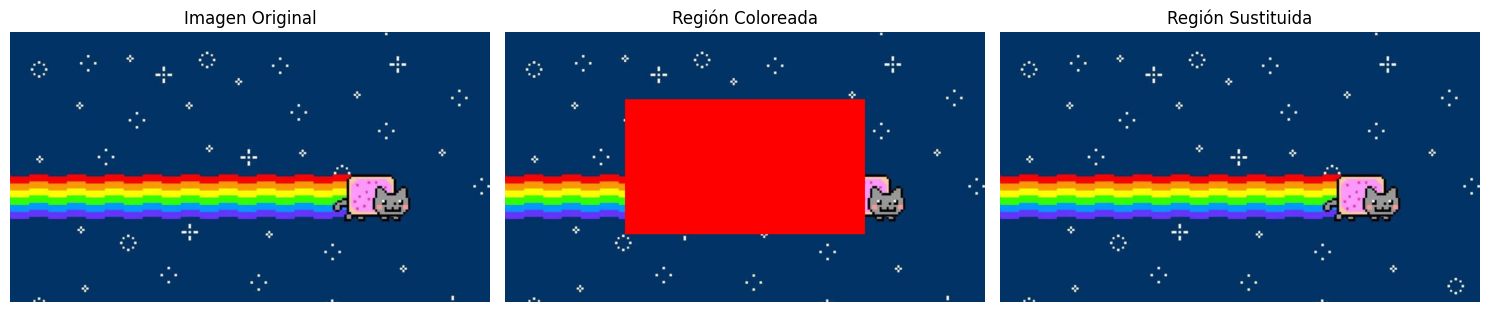

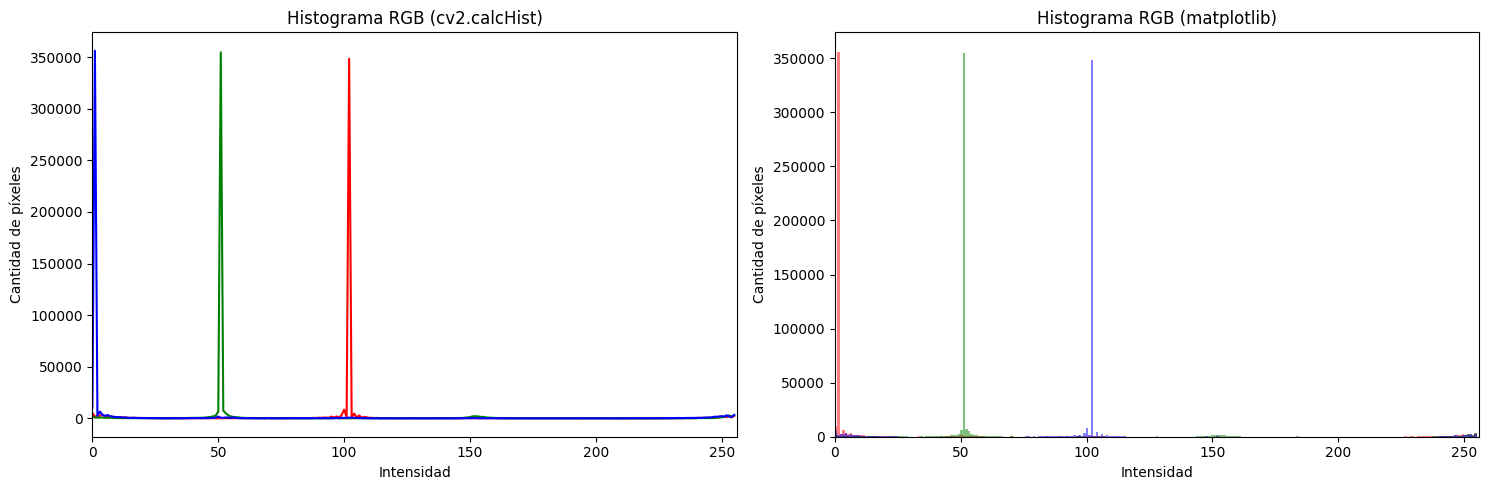

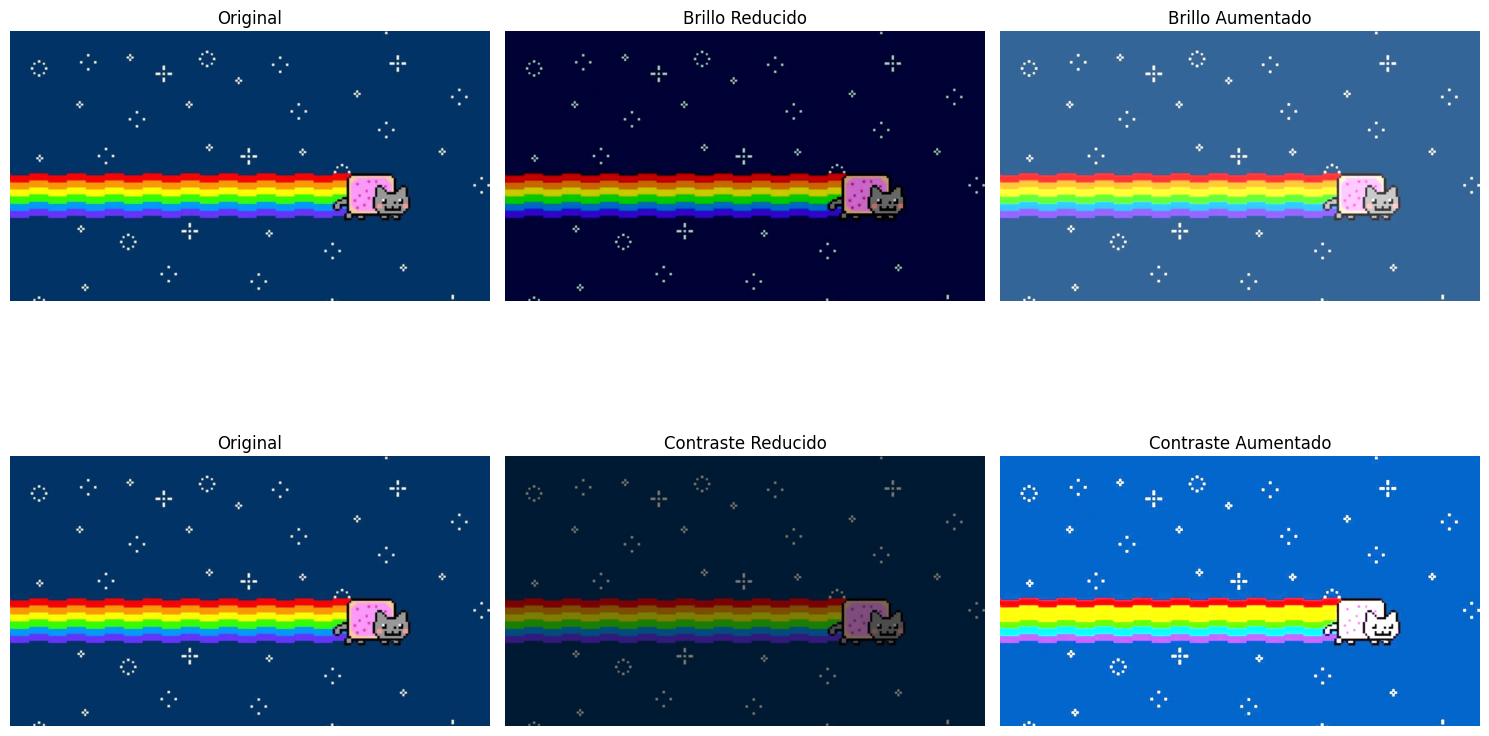

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar una imagen en color
imagen = cv2.imread('rainbow-cat.jpg')
if imagen is None:
    print("Error al cargar la imagen. Verifica la ruta.")
else:
    # Convertir de BGR (formato OpenCV) a RGB para visualización correcta
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    
    # Mostrar la imagen original
    plt.figure(figsize=(15, 10))
    plt.subplot(231)
    plt.title('Imagen Original (RGB)')
    plt.imshow(imagen_rgb)
    plt.axis('off')
    
    # Acceder y mostrar los canales RGB por separado
    canal_r, canal_g, canal_b = cv2.split(imagen_rgb)
    
    plt.subplot(232)
    plt.title('Canal R')
    plt.imshow(canal_r, cmap='Reds')
    plt.axis('off')
    
    plt.subplot(233)
    plt.title('Canal G')
    plt.imshow(canal_g, cmap='Greens')
    plt.axis('off')
    
    plt.subplot(234)
    plt.title('Canal B')
    plt.imshow(canal_b, cmap='Blues')
    plt.axis('off')
    
    # Convertir a HSV y mostrar canales
    imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    canal_h, canal_s, canal_v = cv2.split(imagen_hsv)
    
    plt.subplot(235)
    plt.title('Canal H (Tono)')
    plt.imshow(canal_h, cmap='hsv')
    plt.axis('off')
    
    plt.subplot(236)
    plt.title('Canal V (Brillo)')
    plt.imshow(canal_v, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Modificar regiones específicas de la imagen
    imagen_modificada = imagen_rgb.copy()
    
    # Cambiar el color de un área rectangular (x1:x2, y1:y2)
    alto, ancho = imagen_modificada.shape[:2]
    x1, y1 = int(ancho * 0.25), int(alto * 0.25)
    x2, y2 = int(ancho * 0.75), int(alto * 0.75)
    
    # Pintar un rectángulo de color rojo
    imagen_modificada[y1:y2, x1:x2, 0] = 255  # Canal R
    imagen_modificada[y1:y2, x1:x2, 1] = 0    # Canal G
    imagen_modificada[y1:y2, x1:x2, 2] = 0    # Canal B
    
    # Sustituir una región por otra parte de la imagen
    imagen_sustituida = imagen_rgb.copy()
    region_origen = imagen_rgb[0:100, 0:100].copy()
    imagen_sustituida[alto-100:alto, ancho-100:ancho] = region_origen
    
    # Mostrar las imágenes modificadas
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.title('Imagen Original')
    plt.imshow(imagen_rgb)
    plt.axis('off')
    
    plt.subplot(132)
    plt.title('Región Coloreada')
    plt.imshow(imagen_modificada)
    plt.axis('off')
    
    plt.subplot(133)
    plt.title('Región Sustituida')
    plt.imshow(imagen_sustituida)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Calcular y visualizar histograma de intensidades
    plt.figure(figsize=(15, 5))
    
    # Histograma usando cv2.calcHist()
    plt.subplot(121)
    colores = ('r', 'g', 'b')
    for i, color in enumerate(colores):
        hist = cv2.calcHist([imagen], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title('Histograma RGB (cv2.calcHist)')
    plt.xlabel('Intensidad')
    plt.ylabel('Cantidad de píxeles')
    plt.xlim([0, 256])
    
    # Histograma usando matplotlib
    plt.subplot(122)
    plt.hist(imagen_rgb[:,:,0].ravel(), bins=256, color='r', alpha=0.5)
    plt.hist(imagen_rgb[:,:,1].ravel(), bins=256, color='g', alpha=0.5)
    plt.hist(imagen_rgb[:,:,2].ravel(), bins=256, color='b', alpha=0.5)
    plt.title('Histograma RGB (matplotlib)')
    plt.xlabel('Intensidad')
    plt.ylabel('Cantidad de píxeles')
    plt.xlim([0, 256])
    
    plt.tight_layout()
    plt.show()
    
    # Ajustes de brillo y contraste
    
    # Método manual
    def ajustar_brillo_contraste_manual(imagen, alfa, beta):
        # alfa: contraste (1.0-3.0)
        # beta: brillo (0-100)
        return np.clip(alfa * imagen + beta, 0, 255).astype(np.uint8)
    
    # Método con OpenCV
    def ajustar_brillo_contraste_opencv(imagen, alfa, beta):
        return cv2.convertScaleAbs(imagen, alpha=alfa, beta=beta)
    
    # Aplicar ajustes
    brillo_bajo = ajustar_brillo_contraste_manual(imagen_rgb, 1.0, -50)
    brillo_alto = ajustar_brillo_contraste_manual(imagen_rgb, 1.0, 50)
    
    contraste_bajo = ajustar_brillo_contraste_opencv(imagen_rgb, 0.5, 0)
    contraste_alto = ajustar_brillo_contraste_opencv(imagen_rgb, 2.0, 0)
    
    # Mostrar resultados
    plt.figure(figsize=(15, 10))
    
    plt.subplot(231)
    plt.title('Original')
    plt.imshow(imagen_rgb)
    plt.axis('off')
    
    plt.subplot(232)
    plt.title('Brillo Reducido')
    plt.imshow(brillo_bajo)
    plt.axis('off')
    
    plt.subplot(233)
    plt.title('Brillo Aumentado')
    plt.imshow(brillo_alto)
    plt.axis('off')
    
    plt.subplot(234)
    plt.title('Original')
    plt.imshow(imagen_rgb)
    plt.axis('off')
    
    plt.subplot(235)
    plt.title('Contraste Reducido')
    plt.imshow(contraste_bajo)
    plt.axis('off')
    
    plt.subplot(236)
    plt.title('Contraste Aumentado')
    plt.imshow(contraste_alto)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
